In [ ]:
import sys
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

Selecting previously unselected package fonts-nanum.
(Reading database ... 120904 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
import matplotlib.pyplot as plt

# 폰트를 기본폰트로 설정
plt.rc('font', family='NanumBarunGothic')

# 그래프 DPI 기본값 변경
plt.rcParams['figure.dpi'] = 100

In [ ]:
import gdown
import pandas as pd

filename = 'pt_book_fix.csv'
url = '1ps6pZX60zHRZ343cijDCf0I51RRpNTXk'

if url != '' :
    gdown.download(f'https://drive.google.com/uc?id={url}', filename, quiet=False)
    dir = ''
else :
    dir = '../_csv/'  # 로컬 컴퓨터 환경에서 사용할 dir (예제는 _csv)

pt_book = pd.read_csv(f'{dir}{filename}', low_memory=False)
pt_book.head()

Downloading...
From: https://drive.google.com/uc?id=1ps6pZX60zHRZ343cijDCf0I51RRpNTXk
To: /content/pt_book_fix.csv
100%|██████████| 28.3M/28.3M [00:00<00:00, 145MB/s] 


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,세이노의 가르침,세이노 지음,데이원,2023,9.79117E+12,NaN,0,NaN,199.1,1,0,2023-03-30
1,2,서울대생의 비밀과외,"소린TV,안소린 [공]지음",다산에듀,2023,9.79113E+12,NaN,1,NaN,373.7,1,0,2023-03-30
2,3,(현직 고등학교 선생님들이 직접 고른) 생기부 필독서 100,주경아 외 지음,센시오,2023,9.79117E+12,NaN,1,NaN,376.6,1,0,2023-03-30
3,4,당연하게도 나는 너를,이꽃님 지음,우리학교,2023,9.79117E+12,NaN,4,NaN,813.7,1,0,2023-03-30
4,5,고요한 우연,김수빈 지음,문학동네,2023,9.78895E+12,NaN,0,NaN,813.7,1,0,2023-03-30


In [ ]:
#책의 갯수가 가장 많은 출판사 top30 카운트
top30_pubs = pt_book['출판사'].value_counts()[:30]
top30_pubs

웅진씽크빅       3056
문학동네        2897
김영사         2808
시공사         2297
비룡소         1810
민음사         1598
창비          1566
위즈덤하우스      1484
자음과모음       1113
한국헤밍웨이      1071
예림당         1037
문학과지성사       987
다산북스         917
랜덤하우스코리아     849
대한교과서        807
현암사          772
사계절출판사       769
웅진닷컴         764
푸른숲          760
살림출판사        758
삼성출판사        735
지경사          718
대교출판         715
넥서스          682
한길사          674
열린책들         646
황금가지         633
길벗           622
미래엔          620
푸른책들         573
Name: 출판사, dtype: int64

In [ ]:
#데이터 프레임 안의 각 인덱스 항목이 top30에 있는지 확인
top30_pubs_idx = pt_book['출판사'].isin(top30_pubs.index)
top30_pubs_idx

0         False
1         False
2         False
3         False
4          True
          ...  
207137    False
207138    False
207139    False
207140     True
207141    False
Name: 출판사, Length: 207142, dtype: bool

In [ ]:
top30_pubs_idx.sum()

34738

# 산점도 그리기

In [ ]:
#랜덤하게 1000개의 샘플을 뽑는 함수
pt_book_sample = pt_book[top30_pubs_idx].sample(1000, random_state=42)
pt_book_sample.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
7755,8741,팩트풀니스[큰글자도서],"한스 로슬링,올라 로슬링,안나 로슬링 뢴룬드 [공]지음;이창신 옮김",김영사,2020,9.78893E+12,9.788930e+12,0,1,331.54,1,1,2022-02-19
10588,11794,(존 내쉬가 들려주는) 의사결정이론 이야기,유소연 지음,자음과모음,2011,9.78895E+12,NaN,0,NaN,410,1,1,2021-07-28
91339,96318,내 안에 사는 너,오드리 니페네거 지음;나중길 옮김,살림출판사,2010,9.78895E+12,9.788950e+12,0,1,843.6,1,7,2010-05-25
93240,98303,미키의 클럽하우스에서 벌어진 세 가지 사건,예림당 편집부 엮음,예림당,2009,9.78893E+12,NaN,7,NaN,843,1,31,2010-04-13
159586,173710,채근담,hitoon.com 만화;남인숙 해설;송항룡;이기동 감수,한국헤밍웨이,2003,9.78896E+12,9.788960e+12,7,58,152,1,42,2004-04-30


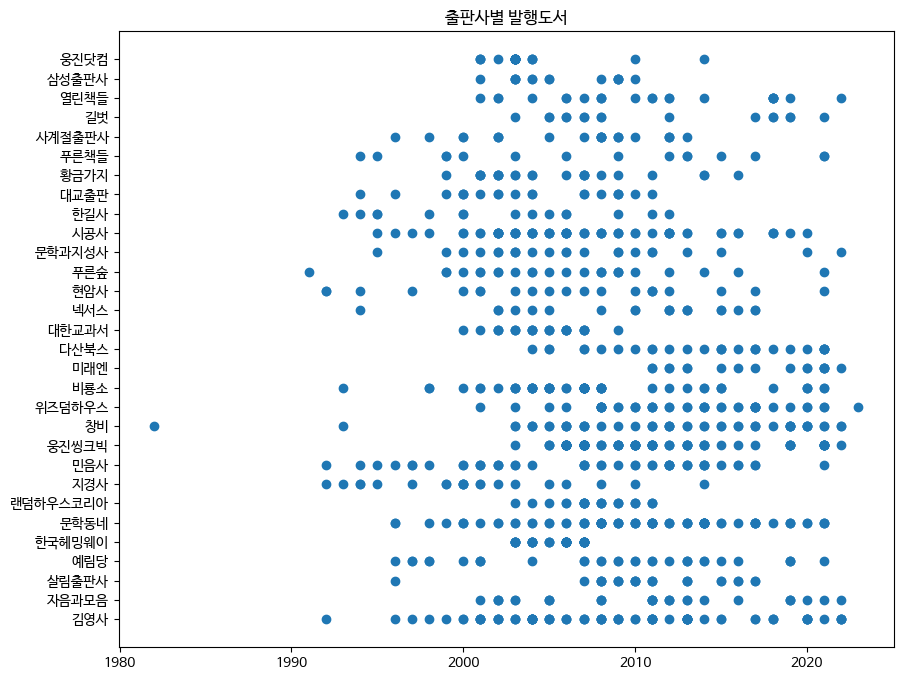

In [ ]:
# 출판사별 발행도서 년도
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(pt_book_sample['발행년도'], pt_book_sample['출판사'])
ax.set_title('출판사별 발행도서')

fig.show()

In [ ]:
# 산점도의 마커 크기 (기본 6.0)
plt.rcParams['lines.markersize']

6.0

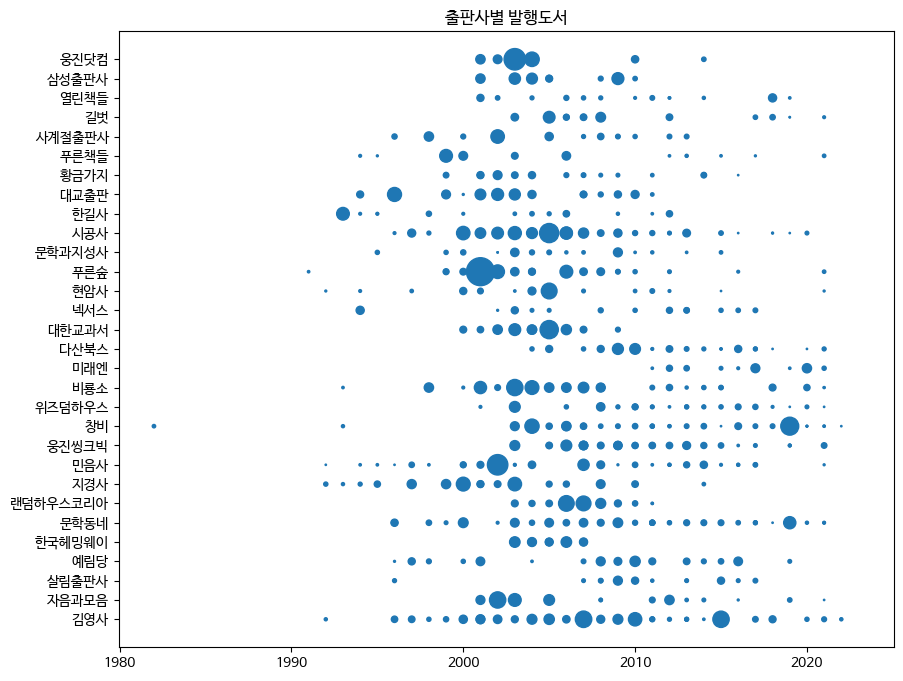

In [ ]:
# 출판사별 발행도서 대출건수 산점도 (s = 마커의 크기)
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(pt_book_sample['발행년도'], pt_book_sample['출판사'], s = pt_book_sample['대출건수'])
ax.set_title('출판사별 발행도서')

fig.show()

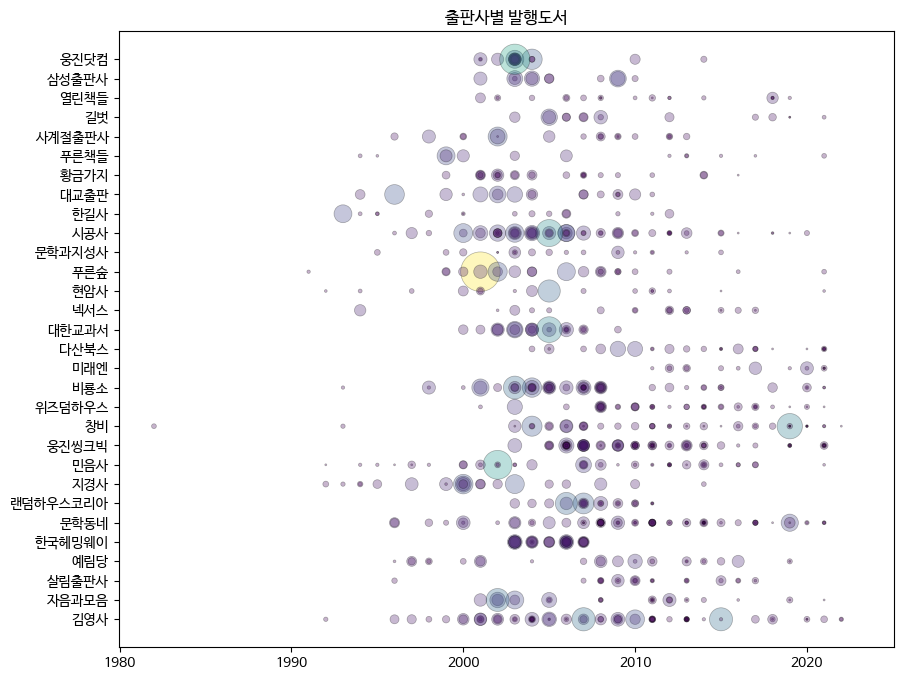

In [ ]:
# 출판사별 발행도서 대출건수 산점도 (s = 마커의 크기, c = 색상)
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(pt_book_sample['발행년도'], pt_book_sample['출판사'],
           s = pt_book_sample['대출건수']*2,
           c = pt_book_sample['대출건수'],
           linewidths=0.5, edgecolors='k', alpha=0.3)
ax.set_title('출판사별 발행도서')

fig.show()

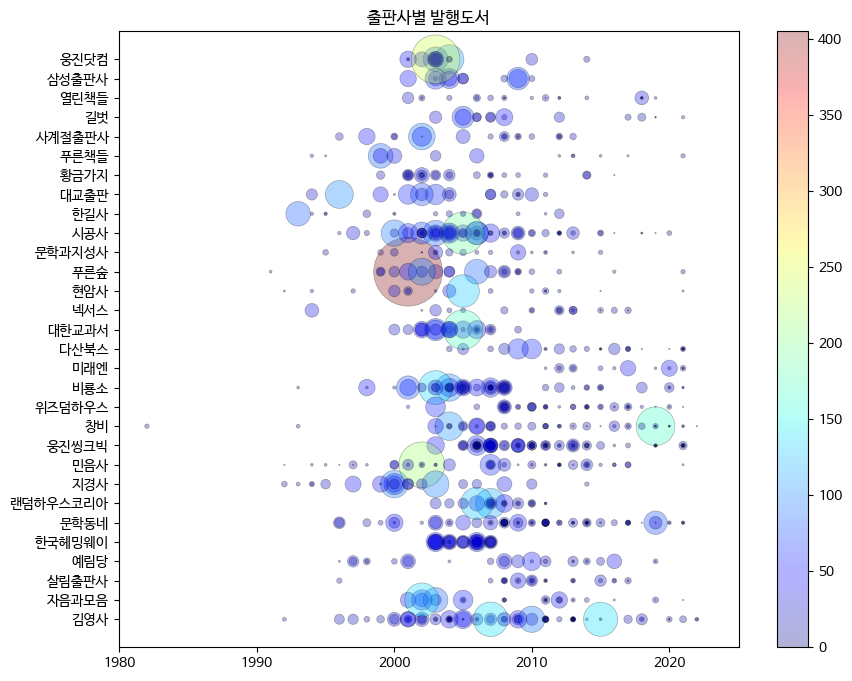

In [ ]:
# 출판사별 발행도서 대출건수 산점도 (s = 마커의 크기 ** 1.3 스케일, c = 색상)
fig, ax = plt.subplots(figsize=(10, 8))
sc = ax.scatter(pt_book_sample['발행년도'], pt_book_sample['출판사'],
                s = pt_book_sample['대출건수']**1.3,
                c = pt_book_sample['대출건수'],
                cmap='jet',
                linewidths=0.5, edgecolors='k', alpha=0.3)
ax.set_title('출판사별 발행도서')
fig.colorbar(sc)
fig.show()

In [ ]:
plt.colormaps()

In [ ]:
pt_pubs = pt_book[top30_pubs_idx][['출판사', '발행년도', '대출건수']] # 출판사, 발행년도, 대출건수 데이터프레임 뽑기
pt_pubs = pt_pubs.groupby(by = ['출판사', '발행년도']).sum()  # 출판사, 발행년도 별 대출건수 합계
pt_pubs = pt_pubs.reset_index() # 해당 발행년도에 인덱스 추가

pt_pubs[pt_pubs['출판사'] == '길벗'].head()


,출판사,발행년도,대출건수
0,길벗,1994,15
1,길벗,1995,43
2,길벗,1996,19
3,길벗,1997,14
4,길벗,1998,101


# 하나의 피겨에 여러가지 선 그리기

In [ ]:
line1 = pt_pubs[pt_pubs['출판사'] == '길벗']
line2 = pt_pubs[pt_pubs['출판사'] == '삼성출판사']

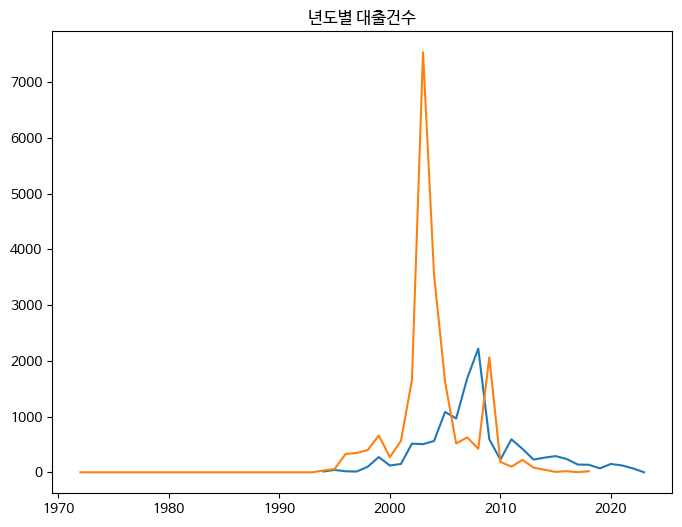

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(line1['발행년도'], line1['대출건수'])
ax.plot(line2['발행년도'], line2['대출건수'])
ax.set_title('년도별 대출건수')
fig.show()

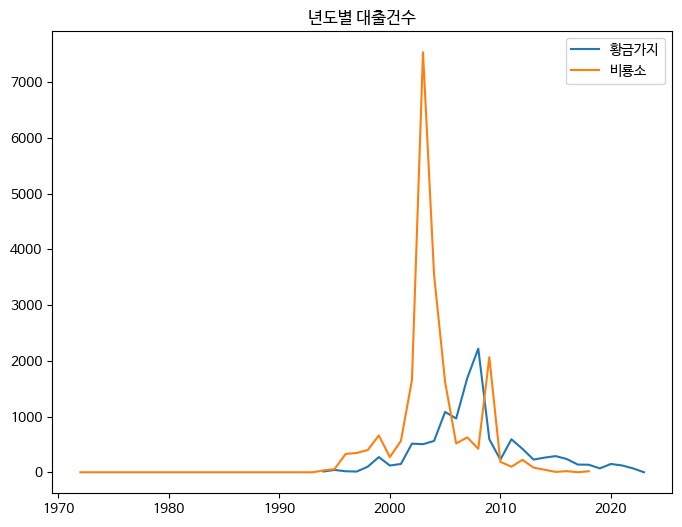

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(line1['발행년도'], line1['대출건수'], label='길벗')
ax.plot(line2['발행년도'], line2['대출건수'], label='삼성출판사')
ax.set_title('년도별 대출건수')
ax.legend() # 범례 추가
fig.show()

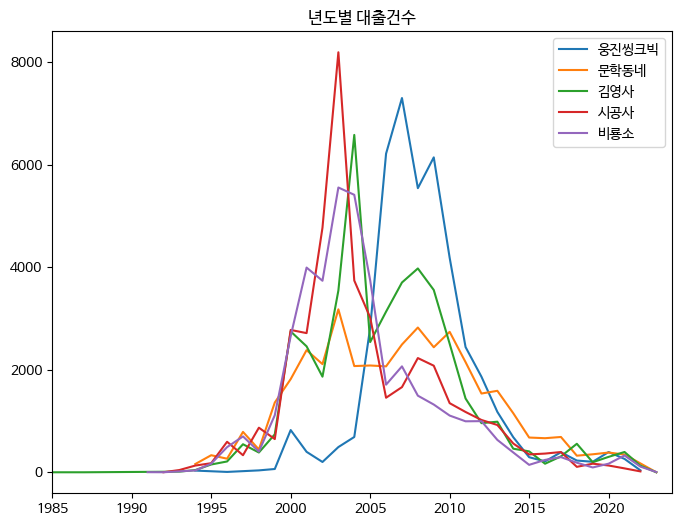

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

for pub in top30_pubs.index[:5]:  # 가장 많이 출판한 출판사 top5
    line = pt_pubs[pt_pubs['출판사'] == pub]  # 출판사 별로 라인
    ax.plot(line['발행년도'], line['대출건수'], label=pub)

ax.set_title('년도별 대출건수')
ax.legend()
ax.set_xlim(1985, 2024)

fig.show()

In [ ]:
pt_pivot = pt_pubs.pivot_table(index='출판사', columns='발행년도')  # 피벗테이블 생성
pt_pivot.head()

대출건수                                               ...                \
발행년도 1972 1981 1982 1985 1986 1987 1988 1989 1990 1991  ...   2015   2016   
출판사                                                     ...                 
길벗    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  291.0  240.0   
김영사   NaN  0.0  NaN  NaN  NaN  0.0  NaN  NaN  NaN  NaN  ...  408.0  167.0   
넥서스   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  117.0  128.0   
다산북스  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  356.0  373.0   
대교출판  NaN  NaN  NaN  NaN  0.0  NaN  0.0  0.0  0.0  0.0  ...    NaN    NaN   

                                                          
발행년도   2017   2018   2019   2020   2021   2022 2023 2104  
출판사                                                       
길벗    140.0  136.0   71.0  150.0  124.0   71.0  1.0  NaN  
김영사   310.0  556.0  196.0  301.0  396.0  129.0  0.0  NaN  
넥서스    97.0  109.0   13.0   50.0  103.0   18.0  0.0  NaN  
다산북스  330.0  182.0  244.0  272.0  347.0  129.0  2.0  NaN  
대교출판    NaN    NaN    NaN    NaN    NaN    NaN  NaN  NaN  

[5 rows x 43 columns]

In [ ]:
pt_pivot.columns[:10] # columns에 멀티 인덱스가 있음

MultiIndex([('대출건수', 1972),
            ('대출건수', 1981),
            ('대출건수', 1982),
            ('대출건수', 1985),
            ('대출건수', 1986),
            ('대출건수', 1987),
            ('대출건수', 1988),
            ('대출건수', 1989),
            ('대출건수', 1990),
            ('대출건수', 1991)],
           names=[None, '발행년도'])

In [ ]:
top10_pubs = top30_pubs.index[:10]
year_cols = pt_pivot.columns.get_level_values(1)  # 멀티인덱스의 요소 추출 (level = 1 발행년도)

Int64Index([1972, 1981, 1982, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2104],
           dtype='int64', name='발행년도')

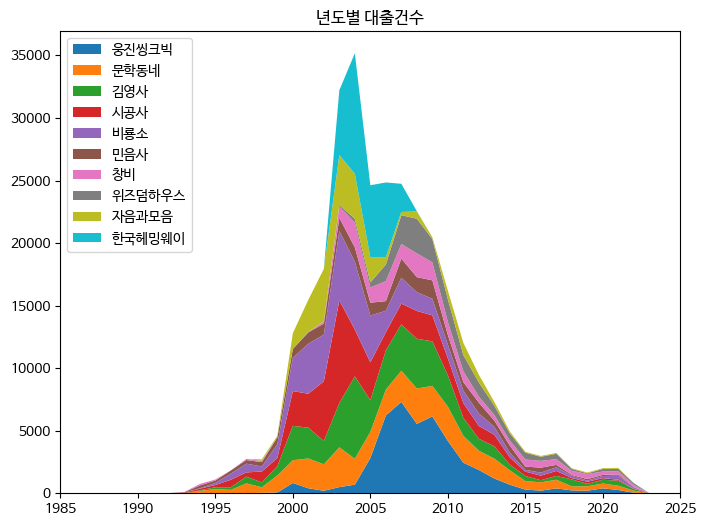

In [ ]:
# 색으로 칠해져 있는 스택 그래프 그리기
fig, ax = plt.subplots(figsize=(8, 6))

ax.stackplot(year_cols, # x축 : 연도별
             pt_pivot.loc[top10_pubs].fillna(0), # y축 : 피벗테이블의 값(na는 0으로)
             labels=top10_pubs)
ax.set_title('년도별 대출건수')
ax.legend(loc='upper left')
ax.set_xlim(1985, 2025)

fig.show()

# 하나의 피겨에 여러개의 막대 그래프 그리기

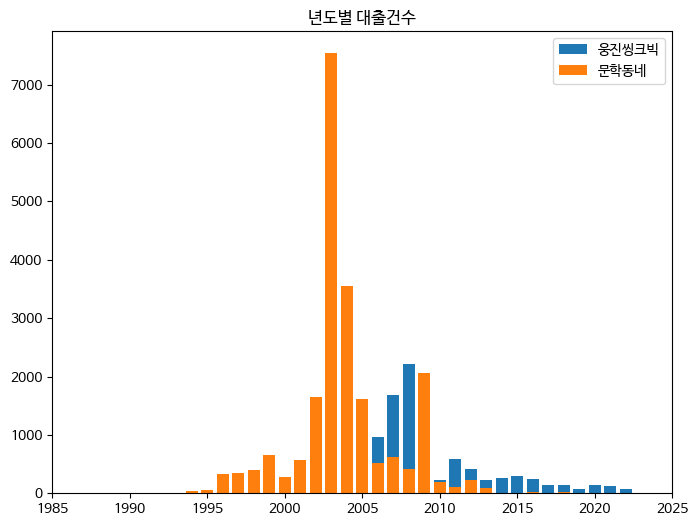

In [ ]:
'''
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(line1['발행년도'], line1['대출건수'], label='웅진씽크빅')
ax.plot(line2['발행년도'], line2['대출건수'], label='문학동네')
ax.set_title('년도별 대출건수')
ax.legend() # 범례 추가
fig.show()
'''

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(line1['발행년도'], line1['대출건수'], label='웅진씽크빅')
ax.bar(line2['발행년도'], line2['대출건수'], label='문학동네')
ax.set_title('년도별 대출건수')
ax.legend()
ax.set_xlim(1985, 2025)
fig.show()


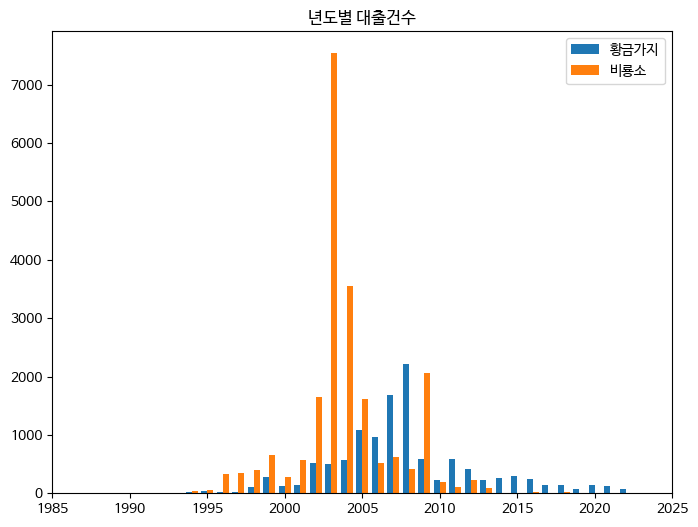

In [ ]:
# 각 막대의 위치 변경, 너비 변경
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(line1['발행년도']-0.2, line1['대출건수'], width=0.4, label='황금가지')
ax.bar(line2['발행년도']+0.2, line2['대출건수'], width=0.4, label='비룡소')
ax.set_title('년도별 대출건수')
ax.legend()
ax.set_xlim(1985, 2025)
fig.show()


# 원 그래프 그리기

In [ ]:
data = top30_pubs[:10]
labels = top30_pubs.index[:10]

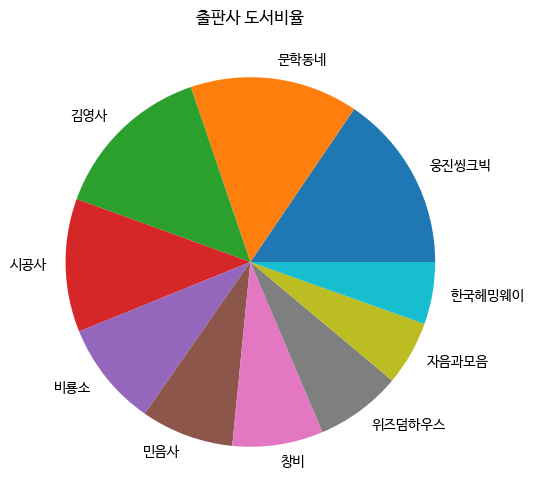

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.pie(data, labels=labels)
ax.set_title('출판사 도서비율')

fig.show()

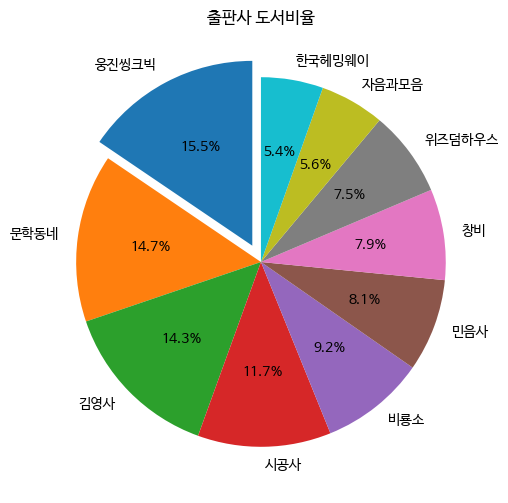

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
 # %.1f (소수점 한자리) %% 퍼센트 문자 / 파이 터뜨리기 ( 1번째 0.1만큼 나머지 다 0 )
ax.pie(data, labels=labels, startangle=90,
       autopct='%.1f%%',
       explode=[0.1]+[0]*9)
ax.set_title('출판사 도서비율')

fig.show()